### Data collection

In [2]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
ticker_symbol = "MSFT" #Chose NASDAQ as the major exchange to study
data = yf.download(ticker_symbol, start = "2020-01-01", end = "2022-01-01", period = "1d") #Chose 5 years data
data.to_csv("Microsoft.csv")

[*********************100%***********************]  1 of 1 completed


### Preprocessing Data

In [4]:
df = pd.read_csv("Microsoft.csv")
df = df.drop([0,1], axis = 0)
df = df.reset_index(drop = True)
df.head(10)

,Price,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,153.93817138671875,160.6199951171875,160.72999572753906,158.3300018310547,158.77999877929688,22622100
1,2020-01-03,152.02142333984375,158.6199951171875,159.9499969482422,158.05999755859375,158.32000732421875,21116200
2,2020-01-06,152.4143524169922,159.02999877929688,159.10000610351562,156.50999450683594,157.0800018310547,20813700
3,2020-01-07,151.02467346191406,157.5800018310547,159.6699981689453,157.32000732421875,159.32000732421875,21634100
4,2020-01-08,153.43026733398438,160.08999633789062,160.8000030517578,157.9499969482422,158.92999267578125,27746500
5,2020-01-09,155.34707641601562,162.08999633789062,162.22000122070312,161.02999877929688,161.83999633789062,21385000
6,2020-01-10,154.6282196044922,161.33999633789062,163.22000122070312,161.17999267578125,162.82000732421875,20725900
7,2020-01-13,156.4875946044922,163.27999877929688,163.30999755859375,161.25999450683594,161.75999450683594,21626500
8,2020-01-14,155.3853759765625,162.1300048828125,163.60000610351562,161.72000122070312,163.38999938964844,23477400
9,2020-01-15,156.39170837402344,163.17999267578125,163.94000244140625,162.57000732421875,162.6199951171875,21417900


In [5]:
columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
df[columns] = df[columns].round(2)
print(df.head(10))

        Price  Adj Close   Close    High     Low    Open    Volume
0  2020-01-02     153.94  160.62  160.73  158.33  158.78  22622100
1  2020-01-03     152.02  158.62  159.95  158.06  158.32  21116200
2  2020-01-06     152.41  159.03  159.10  156.51  157.08  20813700
3  2020-01-07     151.02  157.58  159.67  157.32  159.32  21634100
4  2020-01-08     153.43  160.09  160.80  157.95  158.93  27746500
5  2020-01-09     155.35  162.09  162.22  161.03  161.84  21385000
6  2020-01-10     154.63  161.34  163.22  161.18  162.82  20725900
7  2020-01-13     156.49  163.28  163.31  161.26  161.76  21626500
8  2020-01-14     155.39  162.13  163.60  161.72  163.39  23477400
9  2020-01-15     156.39  163.18  163.94  162.57  162.62  21417900


In [6]:
df['Price'] = df['Price'].apply(pd.to_datetime, errors = 'coerce')

In [7]:
df.dropna()
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Price      505 non-null    datetime64[ns]
 1   Adj Close  505 non-null    float64       
 2   Close      505 non-null    float64       
 3   High       505 non-null    float64       
 4   Low        505 non-null    float64       
 5   Open       505 non-null    float64       
 6   Volume     505 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.7 KB


In [8]:
X = df.values.flatten()
size = int(len(X) * 0.8)
train, test = X[:size], X[size:]
history = list(train)
predictions = []

### Model Building, Forecasting and Model Evaluation

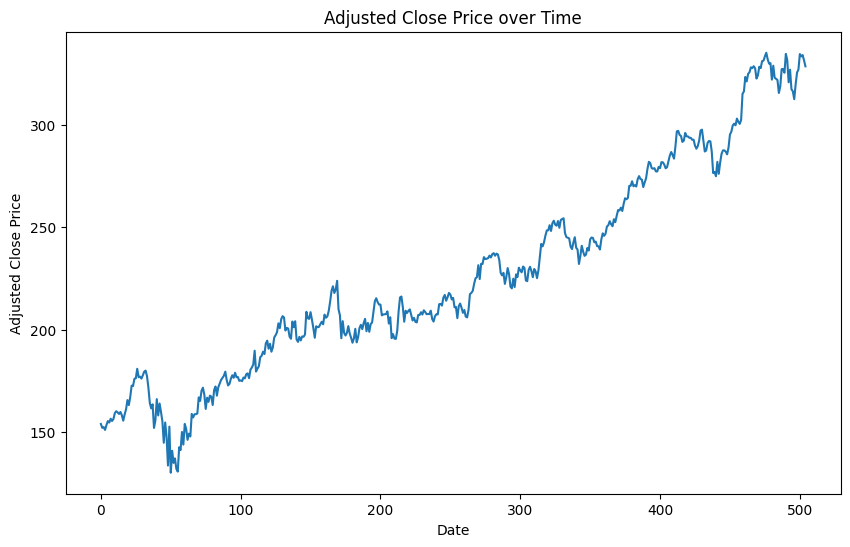

ADF Statistic: -0.11528051743782276
p-value: 0.947895105003835


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Plot the 'Adj Close' to visually inspect the data
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close'])
plt.title('Adjusted Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

# Perform ADF test to check stationarity
result = adfuller(df['Adj Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value > 0.05, the series is non-stationary and needs differencing


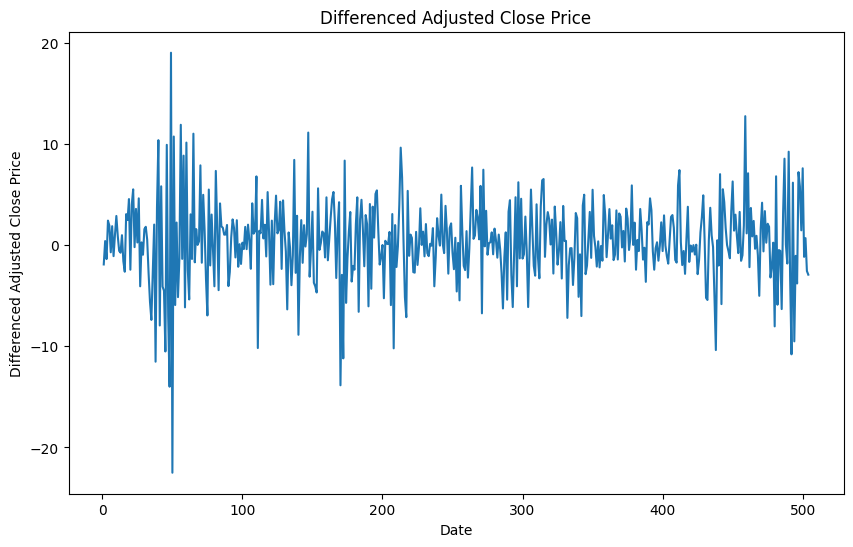

ADF Statistic (Differenced): -7.038530041467492
p-value (Differenced): 5.929129354153398e-10


In [11]:
# Difference the series to make it stationary (if ADF test shows non-stationary)
df['Adj Close Diff'] = df['Adj Close'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close Diff'])
plt.title('Differenced Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Adjusted Close Price')
plt.show()

# Check ADF test again for stationarity
result_diff = adfuller(df['Adj Close Diff'].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]}")
print(f"p-value (Differenced): {result_diff[1]}")


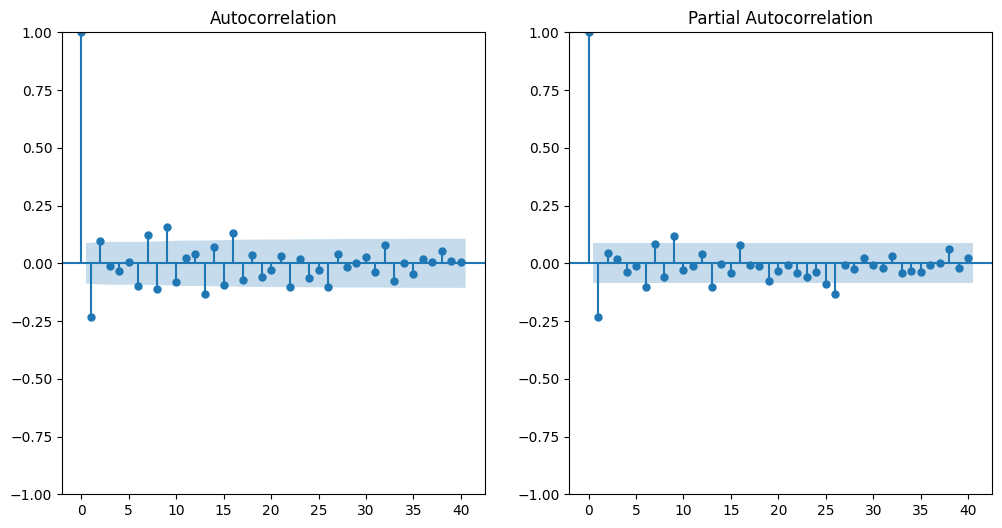

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series to determine p and q
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['Adj Close Diff'].dropna(), lags=40, ax=plt.gca())

plt.subplot(122)
plot_pacf(df['Adj Close Diff'].dropna(), lags=40, ax=plt.gca())

plt.show()


In [13]:
from pmdarima import auto_arima

# Fit ARIMA model using auto_arima for optimal p, d, q
model = auto_arima(df['Adj Close'], 
                   seasonal=False, 
                   stepwise=True, 
                   trace=True, 
                   test='adf',  # ADF test for stationarity
                   information_criterion='aic')

# Print the model summary to check optimal parameters
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2821.766, Time=8.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2856.037, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2830.217, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2833.602, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2857.624, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2832.966, Time=3.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2833.188, Time=4.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2818.864, Time=5.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2830.656, Time=6.64 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2828.925, Time=12.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=14.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2830.811, Time=12.75 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2835.677, Time=5.87 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2830.876, Time=18.28 sec
 ARIMA(3,1,2)(0,0,0)[0]           

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Use the best parameters from auto_arima or ACF/PACF analysis (example: p=1, d=1, q=1)
arima_model = ARIMA(df['Adj Close'], order=(3, 1, 2))
arima_model_fit = arima_model.fit()

# Print model summary
print(arima_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  505
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1405.184
Date:                Sat, 28 Dec 2024   AIC                           2822.368
Time:                        12:27:24   BIC                           2847.703
Sample:                             0   HQIC                          2832.306
                                - 505                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9832      0.064    -30.801      0.000      -2.109      -1.857
ar.L2         -1.2324      0.095    -12.938      0.000      -1.419      -1.046
ar.L3         -0.1448      0.042     -3.409      0.0

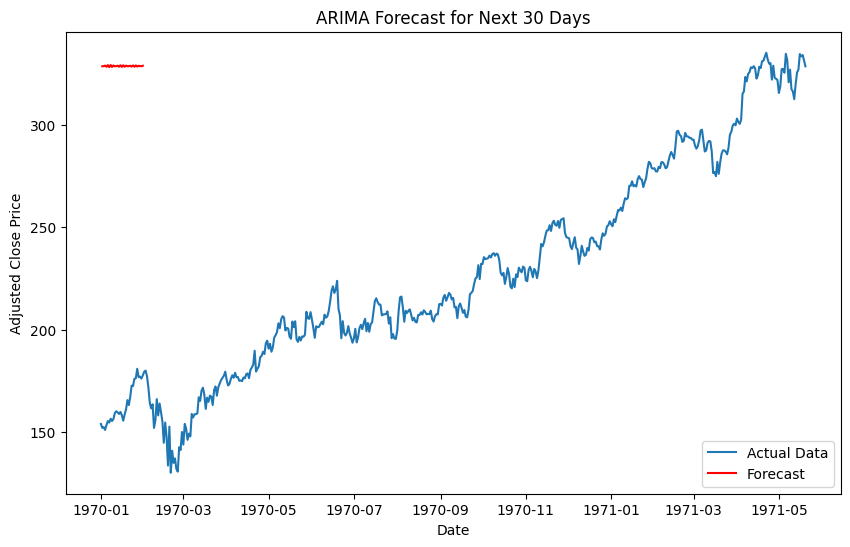

In [15]:
# Forecast future values (for example, next 30 days)
forecast_steps = 30
forecast = arima_model_fit.forecast(steps=forecast_steps)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(df.index, df['Adj Close'], label='Actual Data')

# Create date range for forecast
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Plot forecasted values
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title(f'ARIMA Forecast for Next {forecast_steps} Days')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming you have a test set (e.g., the last 30 days for testing)
test_data = df['Adj Close'].iloc[-forecast_steps:]

# Calculate forecast errors
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = sqrt(mse)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 5.418268630097284
Mean Squared Error (MSE): 45.26430309763509
Root Mean Squared Error (RMSE): 6.72787508041247


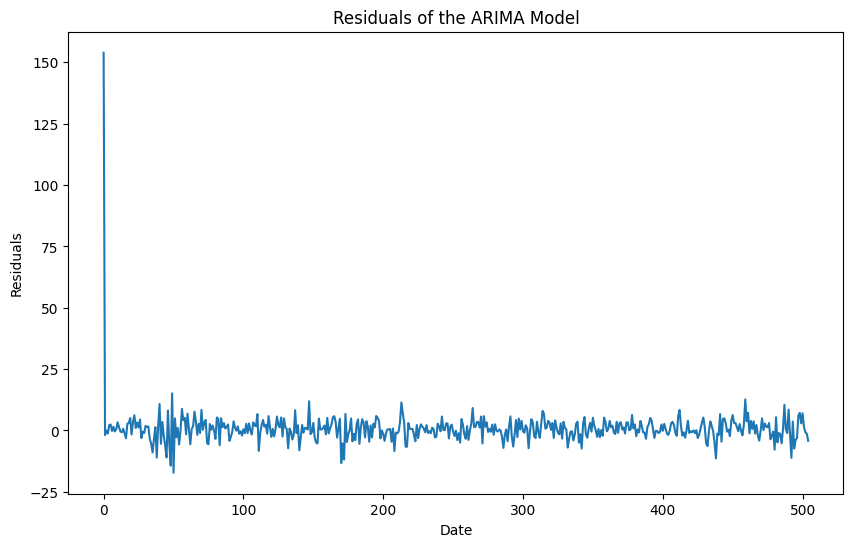

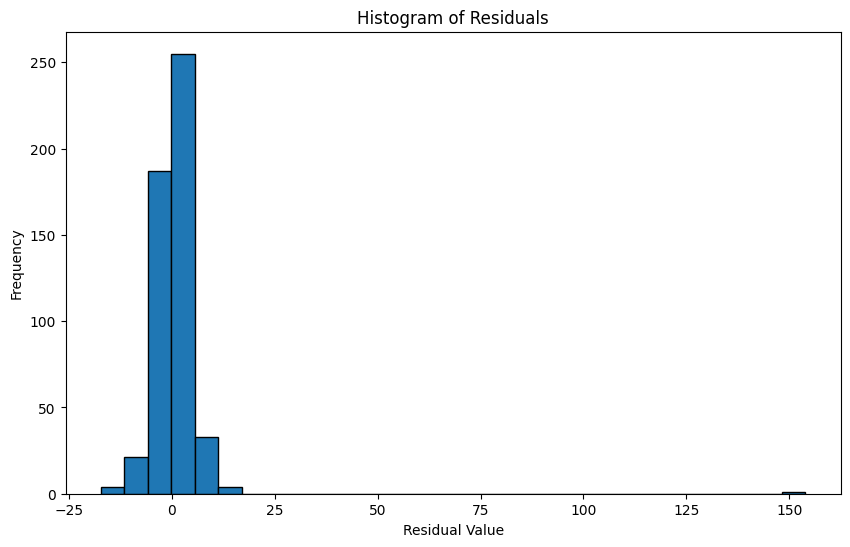

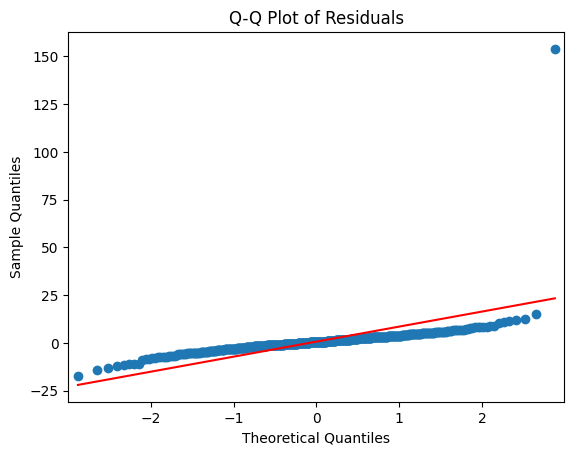

In [17]:
# Residuals of the model
residuals = arima_model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

# Check if residuals are normally distributed using a Q-Q plot
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


C:\Users\rishi\Python\Python3119\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rishi\Python\Python3119\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


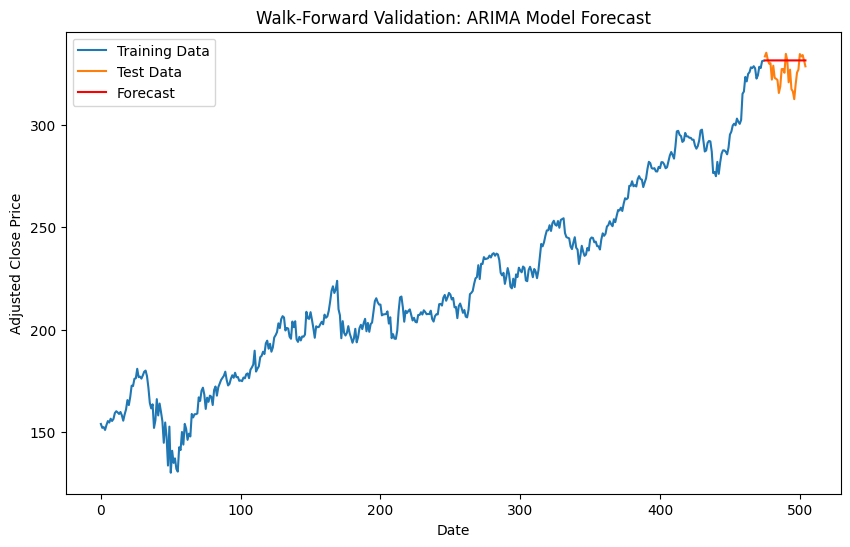

In [19]:
# Walk-forward validation (example: rolling window)
train = df['Adj Close'][:len(df)-forecast_steps]
test = df['Adj Close'][len(df)-forecast_steps:]

# Fit ARIMA model on the training data
walk_forward_model = ARIMA(train, order=(3, 1, 2))
walk_forward_model_fit = walk_forward_model.fit()

# Forecast for the test period
walk_forward_forecast = walk_forward_model_fit.forecast(steps=forecast_steps)

# Plot the forecast against actual data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, walk_forward_forecast, label='Forecast', color='red')
plt.legend()
plt.title('Walk-Forward Validation: ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()


By doing ACF and PACF, we get the optimal parameters for ARIMA are (3,1,2). After that, the train data has been fit by the ARIMA model and used to forecast for the test dataset. The forecasted values are constant, which seems to suggest that the model hasn't really learnt the pattern very well. The residual graph seem to have most of the values centred around 0 and distribution looks like a sharp Gaussian which is ideal. Hence this suggests model seems to have picked some pattern, but still not completely.The errors also seem to suggest forecasted values are preety close to the actual, which is a good sign. 